In [1]:
# Bryan Ochoa July 24 2023 bochoa@lbl.gov

# characterization of piezoelectric displacement using
# data gathered using smaract picoscale interferometer gui, pasting results to a .txt file
# function generator producing a 1 Hz ramp function, +5V peak, 0V min, 50% duty cycle (triangle wave)

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import signal

In [6]:
with open('C:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\1Hz_5V_Triangle_Displacement.txt', 'r') as file:
    lines = file.readlines()
x = []
y = []

for line in lines:
    values = line.strip().split()
    x.append(float(values[0]))
    y.append(float(values[1]))


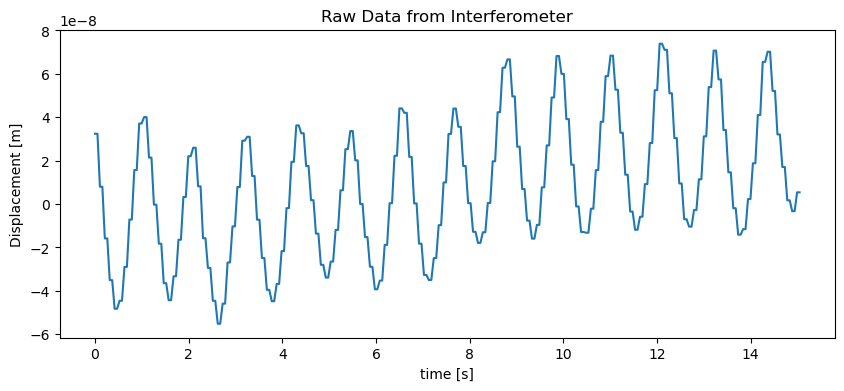

In [17]:
plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.title("Raw Data from Interferometer")
plt.xlabel('time [s]')
plt.ylabel('Displacement [m]')
plt.show()

In [ ]:
# find min and max value for a single period
# then calculate displacement 

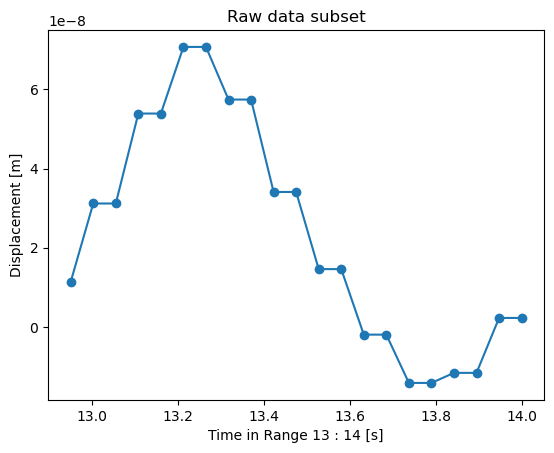

In [202]:
el = 0      # lower element number
eu = 0      # upper element number

tl = 13     # lower time limit
tu = 14    # upper time limit

for i in range(len(x)):
    if x[i] <= tl:
        el = i
    elif x[i] >= tu:
        eu = i
        break

plt.title("Raw data subset")
plt.xlabel(f"Time in Range {tl} : {tu} [s]")
plt.ylabel("Displacement [m]")
#plt.text(.5,6, displacement)
plt.plot(x[el:eu],y[el:eu], marker = 'o')
plt.show()

In [138]:
def triangle_wave(x, amplitude, frequency, vertical_shift):
    period = 1 / frequency
    x_scaled = (x - vertical_shift) * frequency
    return amplitude * (2 * np.abs(2 * (x_scaled - np.floor(x_scaled + 0.5))) - 1)


In [145]:
# Perform curve fitting
# Provide initial guesses for the parameters (amplitude, frequency, vertical_shift)
#initial_guesses = [8, 1, 1]
params, covariance = curve_fit(triangle_wave, x[:60], y[:60])#, p0=initial_guesses)

# Extract the fitted parameters
amplitude_fit, frequency_fit, vertical_shift_fit = params

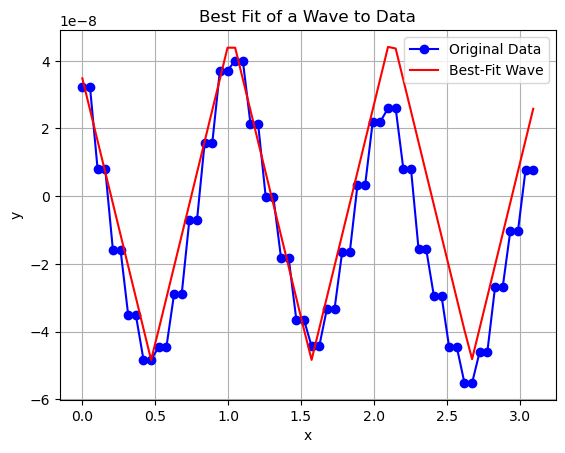

In [146]:
# Generate y values using the fitted parameters
y_fit = triangle_wave(x, amplitude_fit, frequency_fit, vertical_shift_fit)

# Plot the original data and the best-fit wave
plt.plot(x[:60], y[:60], label='Original Data', color='blue', marker='o')
plt.plot(x[:60], y_fit[:60], label='Best-Fit Wave', color='red')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit of a Wave to Data')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [149]:
print(f"Amplitude: {params[0]}, Frequency {params[1]}, Vertical Shift {params[2]}")

print(covariance)

Amplitude: -4.84948803406272e-08, Frequency 0.909286453543562, Vertical Shift 1.0223009137184986
[[ 8.61309486e-18 -3.07169970e-13  1.10264370e-12]
 [-3.07169970e-13  8.74396279e-05  5.03774989e-05]
 [ 1.10264370e-12  5.03774989e-05  1.16390576e-04]]


The diagonal elements are very small (close to zero), indicating relatively low variances and high confidence in the fitted parameters. The off-diagonal elements are also small, indicating low covariance between the fitted parameters. This suggests that the fitted parameters are not strongly correlated and are relatively independent of each other.

Overall, a covariance matrix with small diagonal and off-diagonal elements indicates that the fitting process resulted in reliable and well-determined parameter estimates, which is a desirable outcome.

In [203]:
point1 = np.array(y[0])
point2 = np.array(y[y.index(min(y[:11]))])

# Calculate the displacement (Euclidean distance) between the two points
displacement = np.linalg.norm(point2 - point1)

print("Displacement between the two points:", displacement)

Displacement between the two points: 8.0671e-08


In [166]:
# attempt to fit triangle wave to entire data, not just a subset
# used chatgpt to provide triangle wave fitting algorithm, 
# offered a few different optimization methods, best fit was Powell

# From gpt:
# Powell: Powell's method
# This method is a conjugate direction method, and it does not require
# the computation of derivatives. It is suitable for optimization problems
# where the gradient is hard to compute or not available.

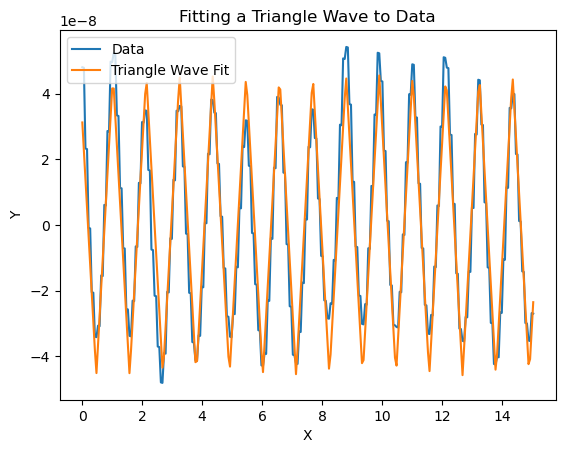

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


xnp = np.array(x)
ynp = np.array(signal.detrend(y))


# Define the triangle wave function
def triangle_wve(x, A, f, phi):
    return A * np.abs(2 * (x * f + phi - np.floor(x * f + phi + 0.5))) - A/2


# Define the error function (mean squared error)
def error(params):
    A, f, phi = params
    return np.mean((ynp - triangle_wve(xnp, A, f, phi))**2)

# Initial guess for the parameters (amplitude, frequency, phase)
initial_guess = [8.0, 1.0, 0.0]

# Perform optimization to find the best-fitting parameters
result = minimize(error, initial_guess, method='Powell')

# Extract the best-fitting parameters from the optimization result
A_fit, f_fit, phi_fit = result.x

# Generate the best-fitting triangle wave based on the found parameters
y_fit = triangle_wave(xnp, A_fit, f_fit, phi_fit)

# Plot the original data and the best-fitting triangle wave
plt.plot(xnp, ynp, label='Data')
plt.plot(xnp, y_fit, label='Triangle Wave Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Triangle Wave to Data')
plt.show()



In [204]:
print(A_fit)
print(f"Amplitude: {A_fit} , Frequency: {f_fit}, Vertical Offset: {phi_fit}")


-9.183870783147358e-08
Amplitude: -9.183870783147358e-08 , Frequency: 0.8999876604356886, Vertical Offset: 6.079959286483044
